11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 63s 72ms/step - accuracy: 0.8799 - loss: 0.4126 - val_accuracy: 0.9843 - val_loss: 0.0554
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.9839 - loss: 0.0514 - val_accuracy: 0.9885 - val_loss: 0.0373
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9889 - loss: 0.0374 - val_accuracy: 0.9888 - val_loss: 0.0381
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9880 - val_loss: 0.0422
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9929 - loss: 0.0215 - val_accuracy: 0.9900 - val_loss: 0.0348
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9876 - loss: 0.0392
Test accuracy: 99.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


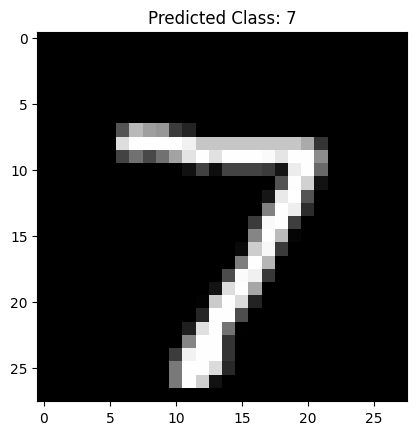

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the model (28x28x1 grayscale images)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predict on a sample image
sample_image = X_test[0].reshape(1, 28, 28, 1)
predicted_class = np.argmax(model.predict(sample_image))

# Plot sample image with prediction
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()
